__Алгоритм Форда-Фалкерсона__

Позволяет определять максмальную пропускную способность в наравленном графе

Вес можно определять, как возможный поток, протекающий по дугам

Вес дуги может быть выражен в разных значениях

Чем больше значение веса, тем выше пропускная способность дуги

Мы должны выбрать вершину истока и вершину стока

Обратное перемещение невозможно

Минимальное значение веса дуги = 1

В конкретном примере исток вершина 1 и сток вершина 6

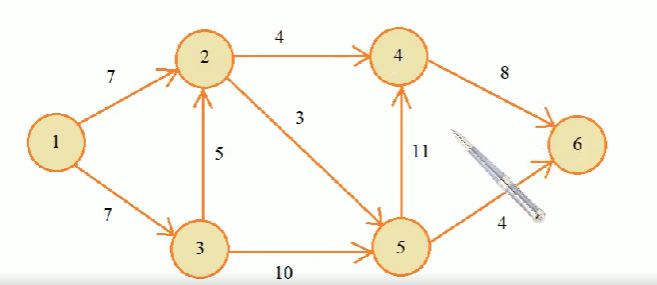

На истоке выходной поток 14, а на стоке 12 -> выходной поток из первой вершины не может превышать 12 единиц

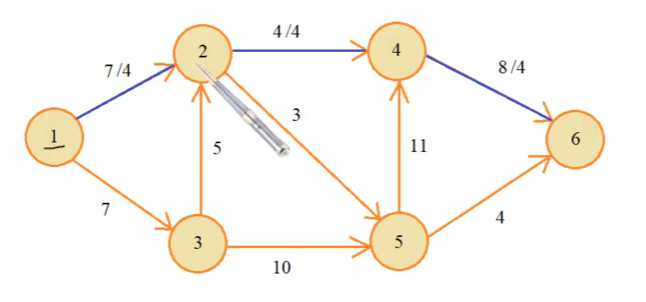

максимальный поток будет соответствовать самому узкому месту в пути

в данному случае самое узкое место - 4, следовательно маршрут по всем этому потоку не может превышать 4

 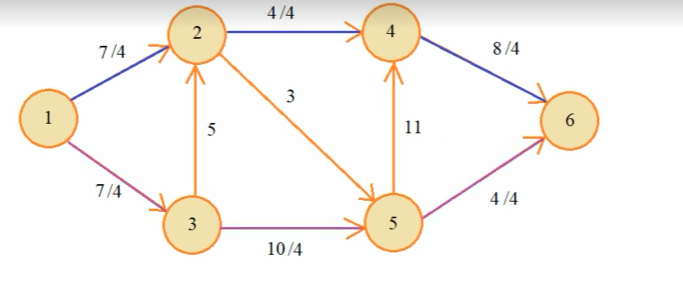

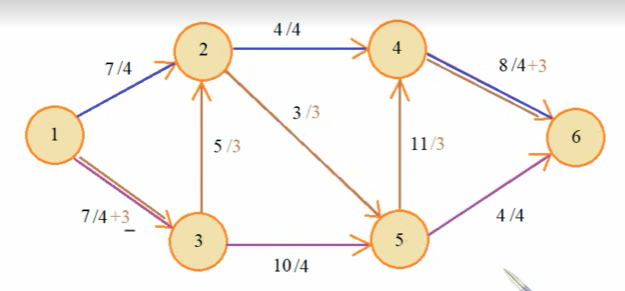

Суммарная величина 7 + 4 = 11

НО ЕСТЬ ЕЩЕ ОДИН МАРШРУТ

1 -> 2 -> 3 -> 5 -> 4 -> 6

НО КАК ТАК МЫ ЖЕ НЕ МОЖЕМ ИДТИ ПРОТИВ СТРЕЛКИ?

все верно! идти не можем, а рассчитывать можем (каво???)

когда двигаемся вдоль стрелки +1, противположно -1

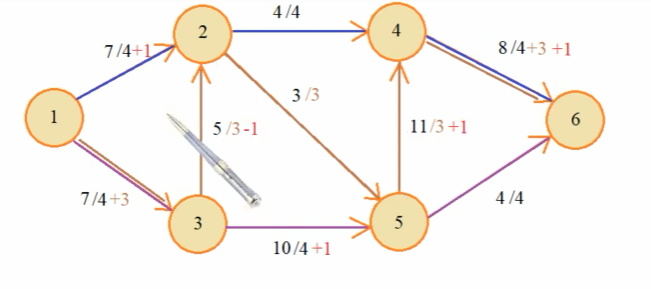

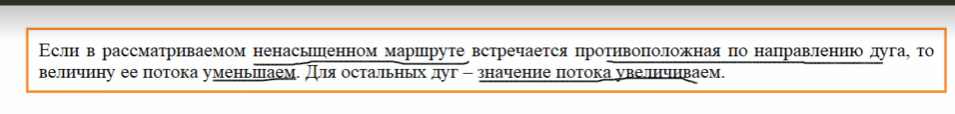

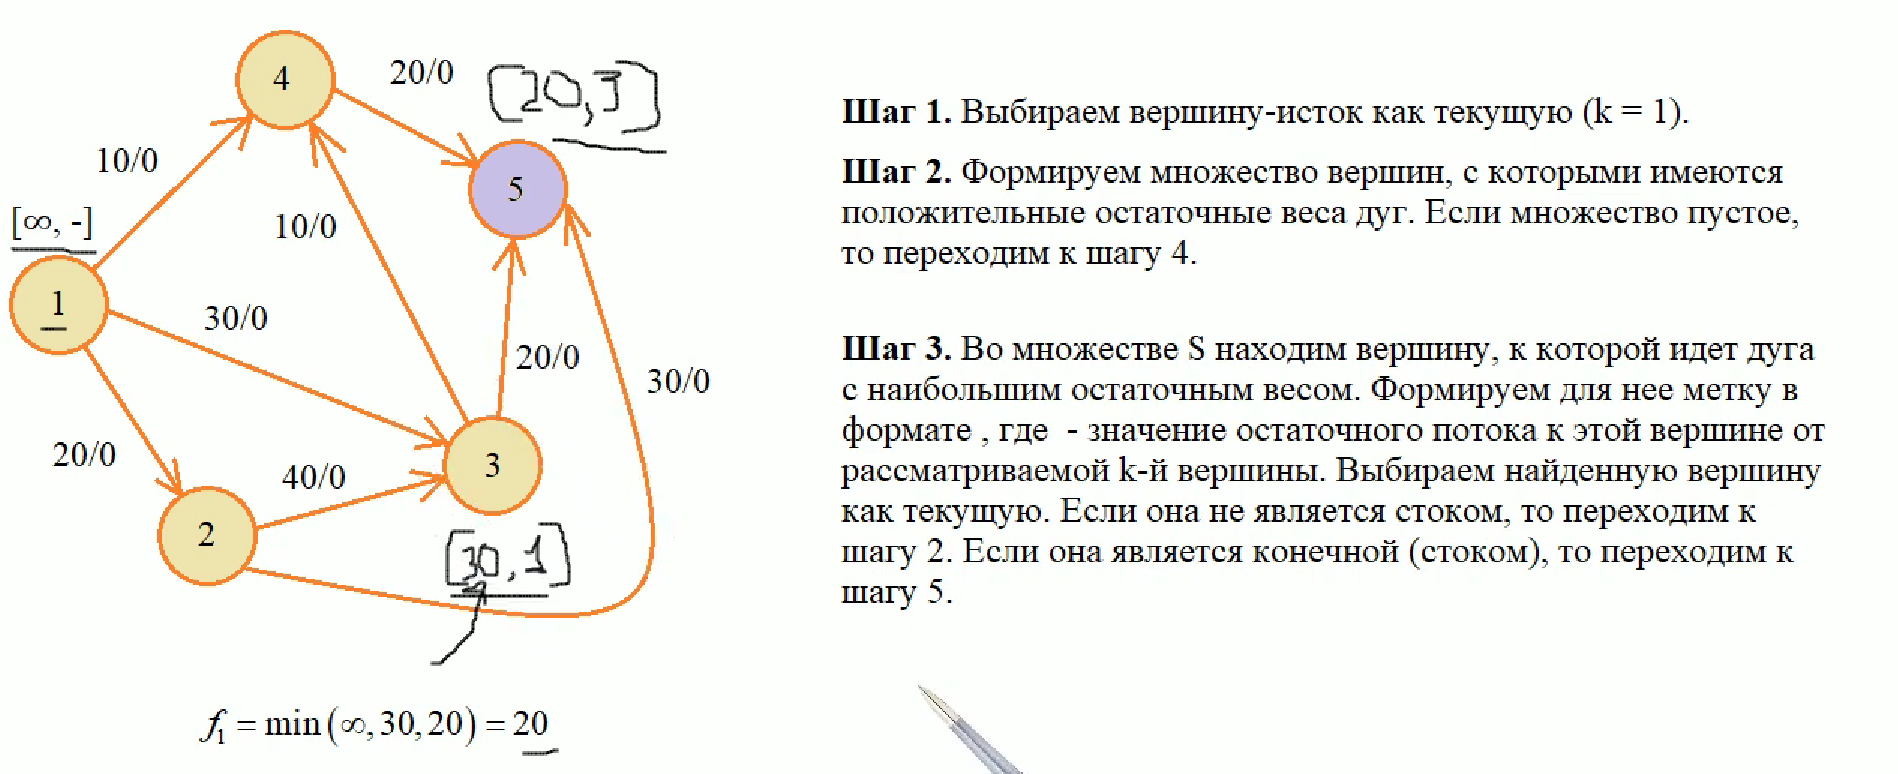

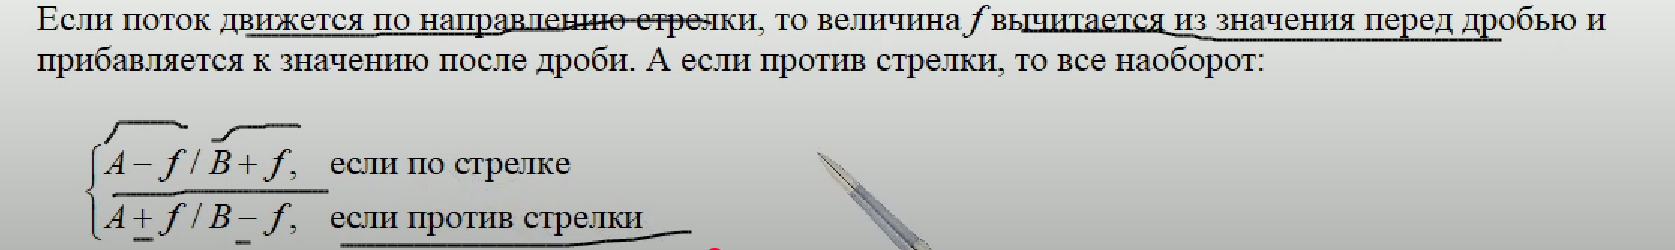

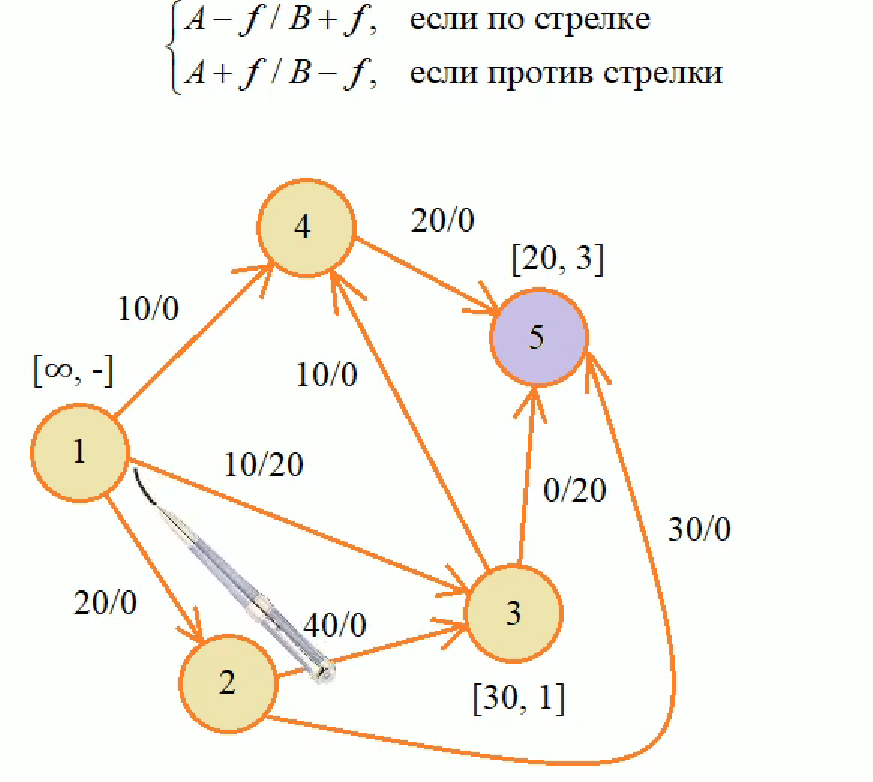

и итерируемся так крч по след путям

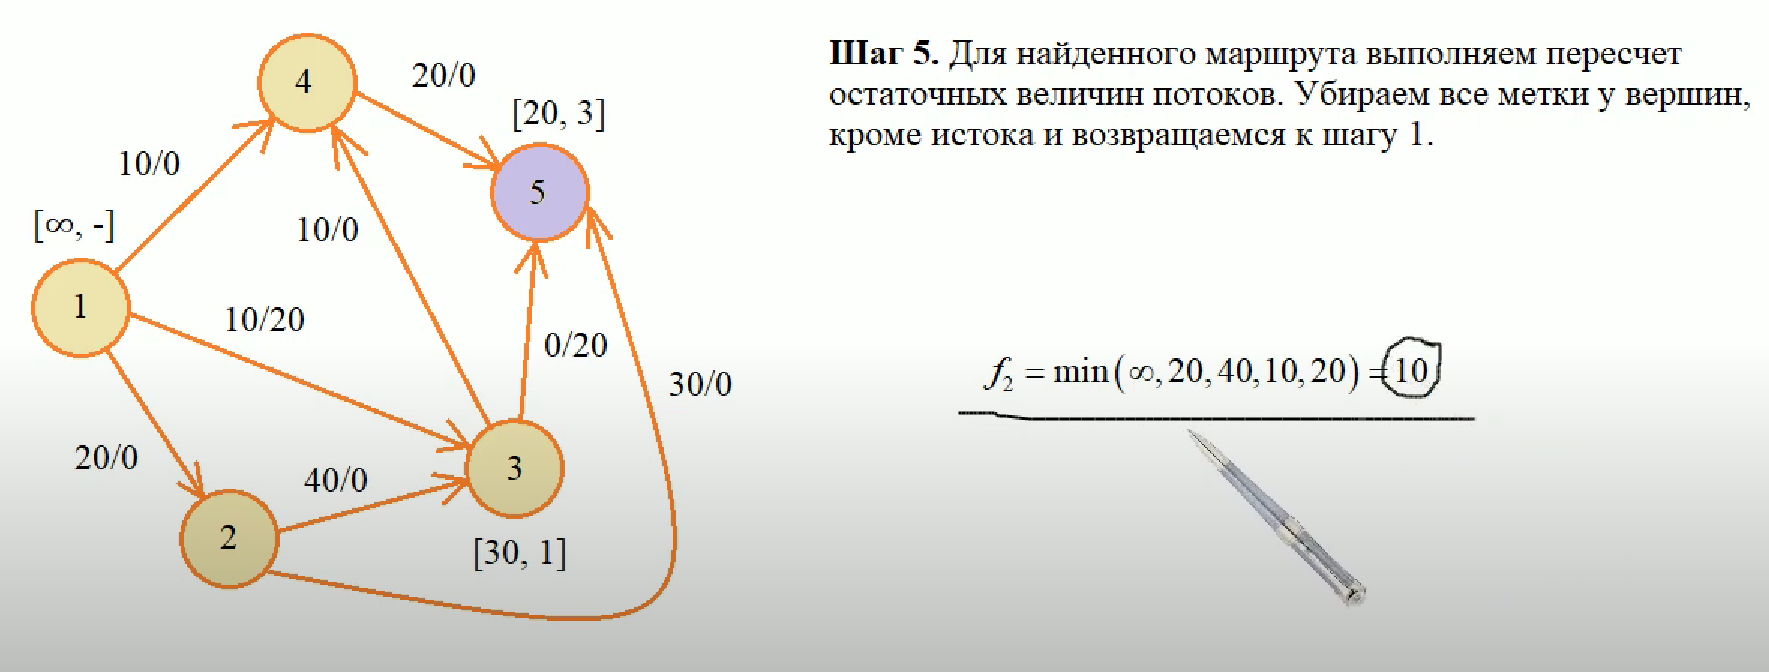

итоговый граф получится:

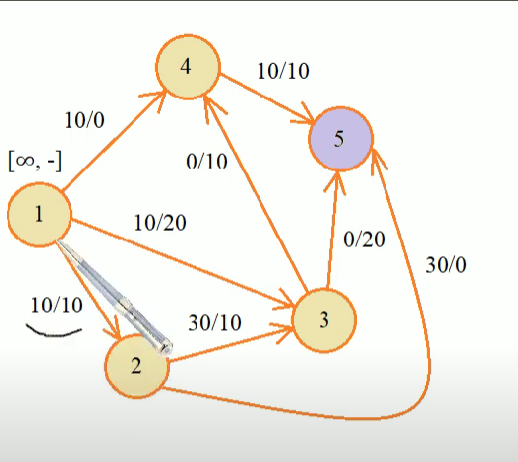

дальше формируем путь по наибольшему значению и __по порядку__ (если значения одинаковые) 

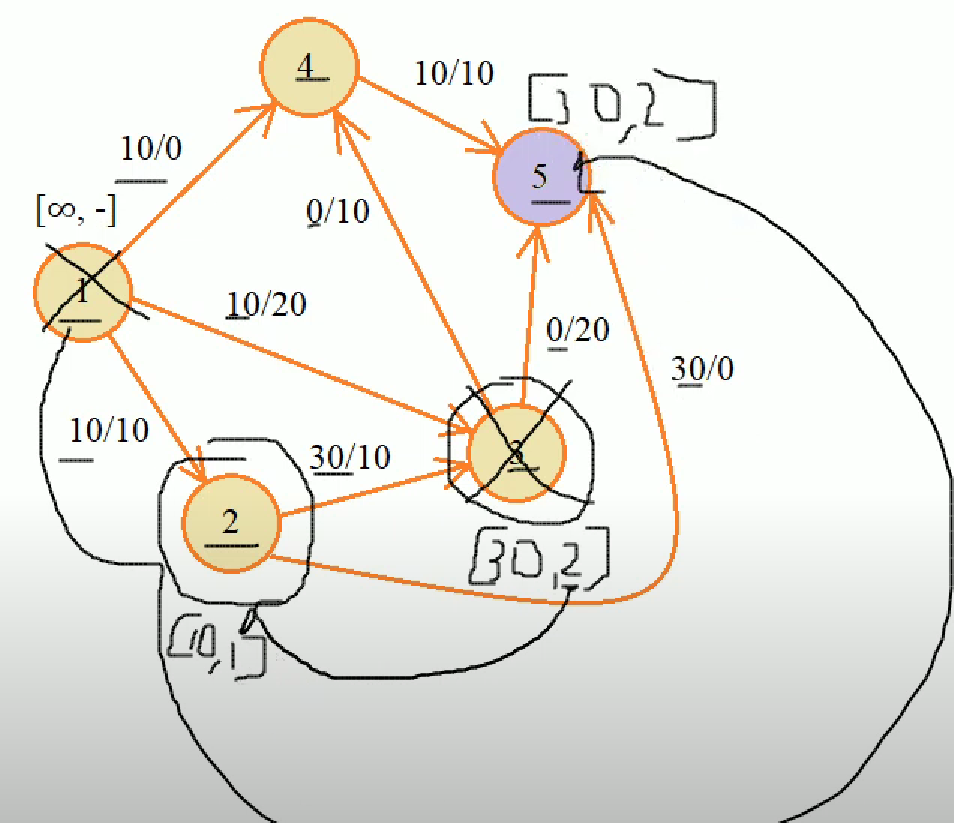

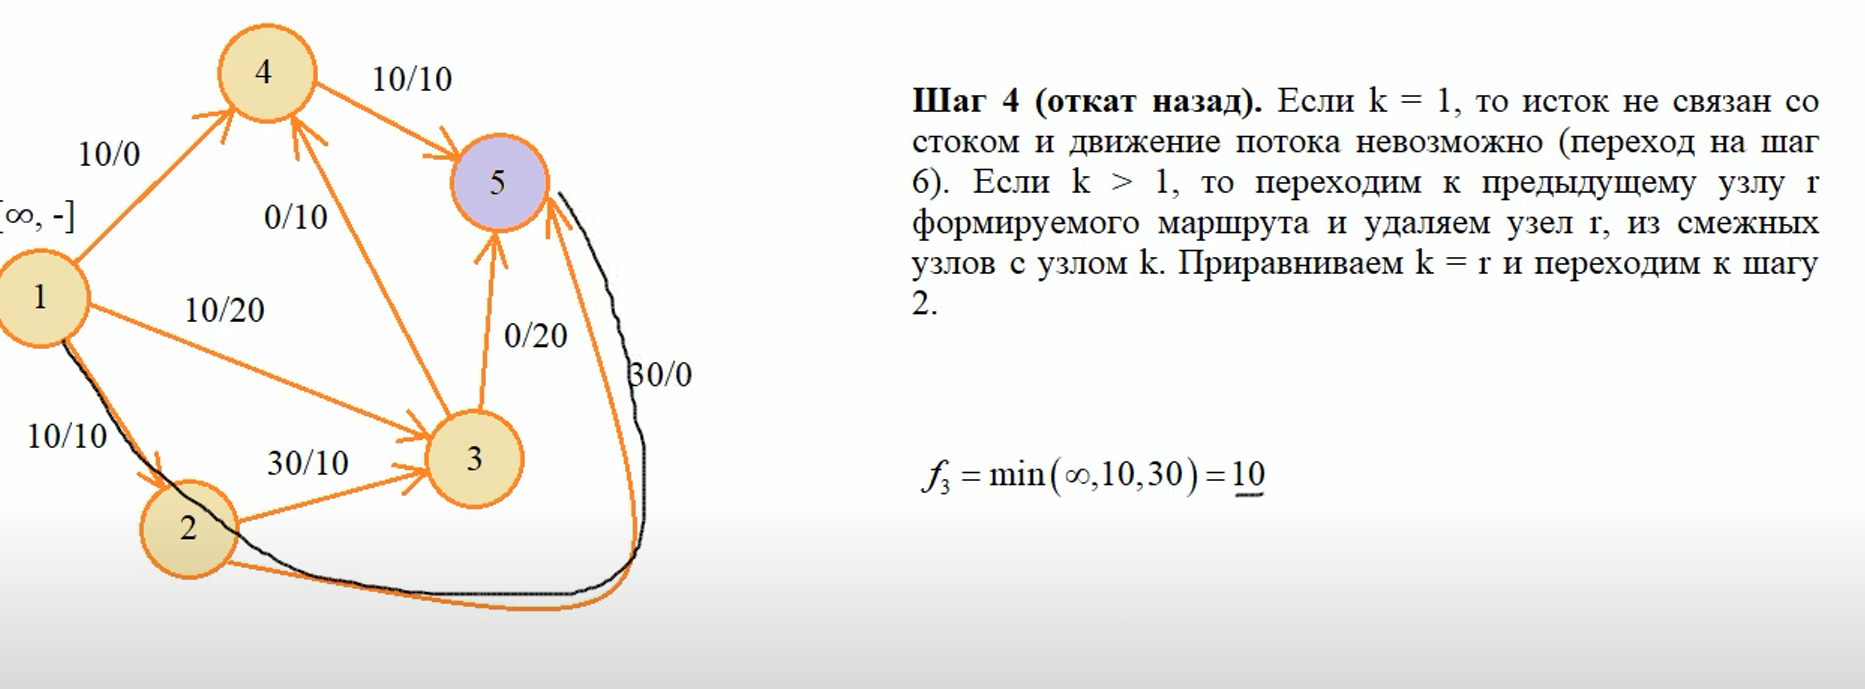

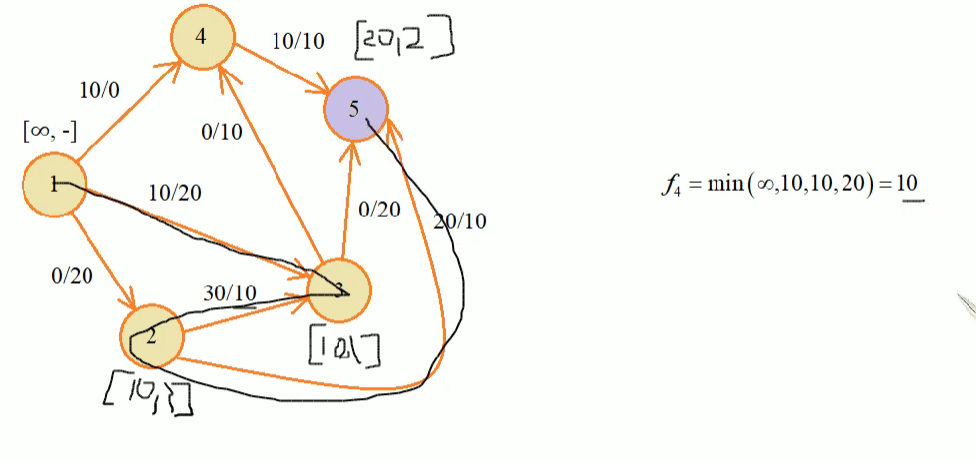

Исходя из этой 10 снова пересчитываем все значения

Когда перебали все варики завершаем алгоритм и вычисляем максимальный поток:

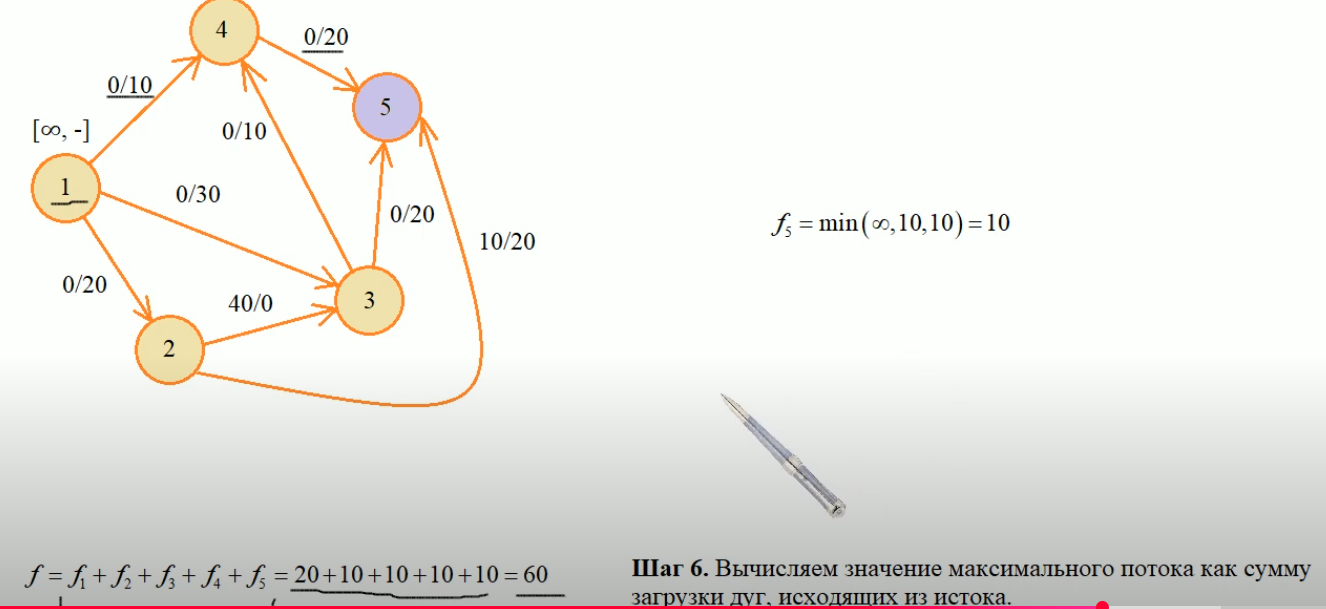

In [8]:
# of Ford Fulkerson algorithm
from collections import defaultdict

# This class represents a directed graph 
# using adjacency matrix representation
class Graph:

    def __init__(self, graph):
        self.graph = graph # residual graph
        self. ROW = len(graph)
        # self.COL = len(gr[0])

    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''

    def BFS(self, s, t, parent):

        # Mark all the vertices as not visited
        visited = [False]*(self.ROW)

        # Create a queue for BFS
        queue = []

        # Mark the source node as visited and enqueue it
        queue.append(s)
        visited[s] = True

        # Standard BFS Loop
        while queue:

            # Dequeue a vertex from queue and print it
            u = queue.pop(0)

            # Get all adjacent vertices of the dequeued vertex u
            # If a adjacent has not been visited, then mark it
            # visited and enqueue it
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    # If we find a connection to the sink node, 
                    # then there is no point in BFS anymore
                    # We just have to set its parent and can return true
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True

        # We didn't reach sink in BFS starting 
        # from source, so return false
        return False
            
    
    # Returns the maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):

        # This array is filled by BFS and to store path
        parent = [-1]*(self.ROW)

        max_flow = 0 # There is no flow initially

        # Augment the flow while there is path from source to sink
        while self.BFS(source, sink, parent) :

            # Find minimum residual capacity of the edges along the
            # path filled by BFS. Or we can say find the maximum flow
            # through the path found.
            path_flow = float("Inf")
            s = sink
            while(s != source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]

            # Add path flow to overall flow
            max_flow += path_flow

            # update residual capacities of the edges and reverse edges
            # along the path
            v = sink
            while(v != source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

        return max_flow


# Create a graph given in the above diagram

graph = [[0, 16, 13, 0, 0, 0],
        [0, 0, 10, 12, 0, 0],
        [0, 4, 0, 0, 14, 0],
        [0, 0, 9, 0, 0, 20],
        [0, 0, 0, 7, 0, 4],
        [0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0; sink = 5

print ("The maximum possible flow is %d " % g.FordFulkerson(source, sink))

The maximum possible flow is 23 
